In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/FDSML_/

/content/drive/MyDrive/FDSML_


In [ ]:
!pip install yellowbrick

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from yellowbrick.features import Manifold
import matplotlib.pyplot as plt
from seaborn import barplot

In [ ]:
# Read the data
data = pd.read_csv('TrainExpImp.csv')

diseaseList = np.empty((0,12))
with open('disease.txt') as f:
    lines = f.readlines()
    for el in lines:
      el = el.replace('\n', '')
      diseaseList = np.append(diseaseList, el)
print(diseaseList)

['Esophagitis' 'Enteritis' 'Asthma' 'Coronary heart disease' 'Pneumonia'
 'Rhinitis' 'Thyroiditis' 'Traumatic brain injury' 'Dermatitis'
 'External otitis' 'Conjunctivitis' 'Mastitis']


In [ ]:
data = pd.read_csv('TrainExpImp.csv')
print("Duplicated Samples: ", (data.duplicated()).sum())

Duplicated Samples:  795


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


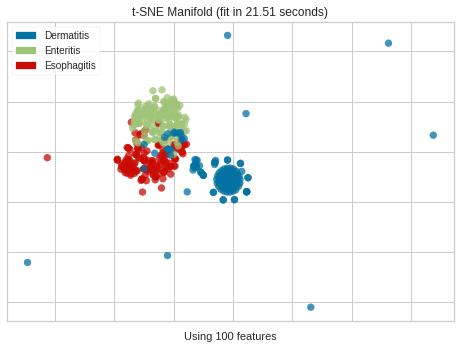

In [ ]:
list1 = ['Dermatitis', 'Enteritis', 'Esophagitis']
X1 = data[data['disease_tag'].isin(list1)]
X1 = X1.to_numpy()
y1 = X1[:, 100]
le = LabelEncoder()
le.fit(list1)
X1 = X1[:, :100]

le = LabelEncoder()
le.fit(list1)
target = le.transform(y1)
viz = Manifold(manifold='tsne', classes=list1, projection=2)
viz.fit_transform(X1, target)
viz.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


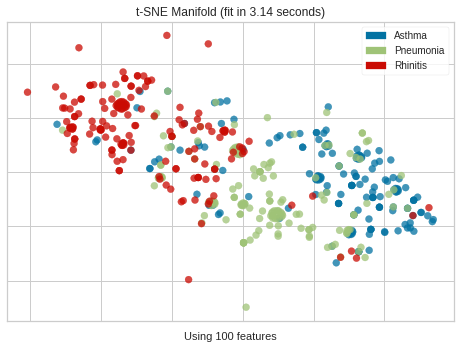

In [ ]:
list2 = ['Asthma', 'Pneumonia', 'Rhinitis']
X2 = data[data['disease_tag'].isin(list2)]
X2 = X2.to_numpy()
y2 = X2[:, 100]
le = LabelEncoder()
le.fit(list2)
X2 = X2[:, :100]

le = LabelEncoder()
le.fit(list2)
target = le.transform(y2)
viz = Manifold(manifold='tsne', classes=list2, projection=2)
viz.fit_transform(X2, target)
viz.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


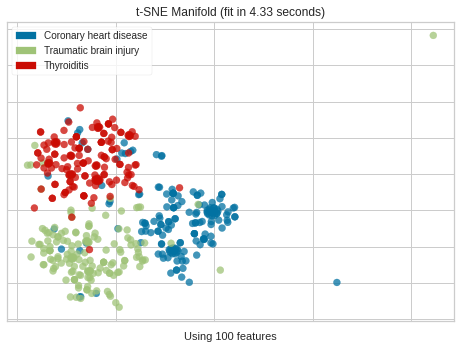

In [ ]:
list3 = ['Coronary heart disease', 'Traumatic brain injury', 'Thyroiditis']
X3 = data[data['disease_tag'].isin(list3)]
X3 = X3.to_numpy()
y3 = X3[:, 100]
le = LabelEncoder()
le.fit(list3)
X3 = X3[:, :100]

le = LabelEncoder()
le.fit(list3)
target = le.transform(y3)
viz = Manifold(manifold='tsne', classes=list3, projection=2)
viz.fit_transform(X3, target)
viz.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


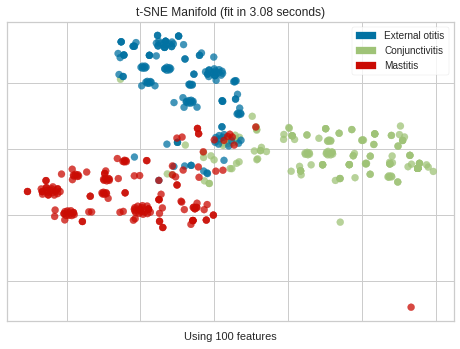

In [ ]:
list4 = ['External otitis', 'Conjunctivitis', 'Mastitis']
X4 = data[data['disease_tag'].isin(list4)]
X4 = X4.to_numpy()
y4 = X4[:, 100]
le = LabelEncoder()
le.fit(list4)
X4 = X4[:, :100]

le = LabelEncoder()
le.fit(list4)
target = le.transform(y4)
viz = Manifold(manifold='tsne', classes=list4, projection=2)
viz.fit_transform(X4, target)
viz.show()

In [ ]:
# Datasets Disease symptoms frequency for each disease
data = pd.read_csv('TrainExpImp.csv')
for j in range(0, 12):
  df = data[data['disease_tag']==diseaseList[j]]
  y = []
  x = []
  for i in range(len(data.columns)-1):
    count = df.iloc[:,i].sum()
    if count > 0:
      y.append(count)
      x.append(data.columns[i])
  fig, ax = plt.subplots(1, figsize=(160,300))
  ax.set_xlabel('Frequency')
  ax.set_ylabel("Symptoms")
  ax.barh(x, y)
  plt.yticks(fontsize=70)
  plt.xticks(fontsize=70)
  plt.title(f"{diseaseList[j]} symptoms count", fontsize=100)
  plt.savefig(diseaseList[j])
  plt.clf()

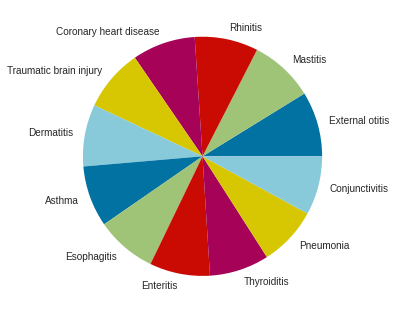

In [ ]:
# Dataset samples percentage
data = pd.read_csv('TrainExpImp.csv')
c = data['disease_tag'].value_counts()
sizes = c.values
labels = c.index.to_numpy()
plt.pie(sizes, labels=labels)
plt.show()

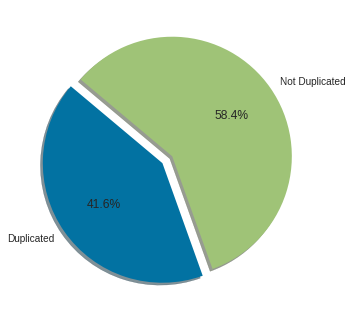

In [ ]:
# Percentage of duplicated samples
data = pd.read_csv('TrainExpImp.csv')
sizes = [(data.duplicated()).sum(), (~data.duplicated()).sum()]
labels = ["Duplicated", "Not Duplicated"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

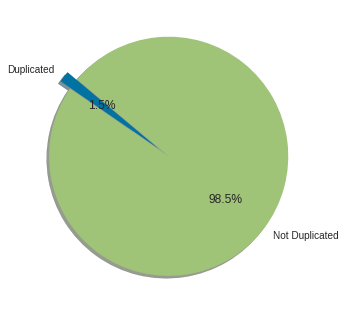

In [ ]:
# Percentage of duplicated samples in TrainExp
data = pd.read_csv('TrainExp.csv')
sizes = [(data.duplicated()).sum(), (~data.duplicated()).sum()]
labels = ["Duplicated", "Not Duplicated"]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()